# Kerasによるニューラルネット実装例(MNIST)

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 自分で設定するパラメータ

# バッチサイズ
batch_size = ___ #1,000単位で10,000までの値を設定

# エポック数
epochs = ___ #5以上100未満の値を設定

In [3]:
# データ抽出
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# one-hot-label に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [4]:
# モデルの構築
model = Sequential()

# 最初の隠れ層(入力784-> 出力___)
model.add(Dense(___, activation='____', input_shape=(784,))) #Denseは好きな整数, activationはsigmoid/relu/linearなどから選択
model.add(Dropout(___))#Dropoutは0より大きく1未満の値を入力

# 2つ目の隠れ層(入力___ -> 出力___)
## 隠れ層は以下の2行をコピペすることで追加できます
model.add(Dense(___, activation='___'))#Denseは好きな整数, activationはsigmoid/relu/linearなどから選択
model.add(Dropout(___))#Dropoutは0より大きく1未満の値を入力

# 出力層(入力___ -> 出力10)
model.add(Dense(10, activation='softmax'))#最後はsoftmax関数固定する

# モデル概要表示
model.summary()

# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop(),
              optimizer='adam',
              metrics=['accuracy'])

# フィッティング(学習)
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# スコアの計算
score = model.evaluate(x_test, y_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               117750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 302       
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
Total params: 118,082
Trainable params: 118,082
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s - loss: 2.2169 - acc: 0.14

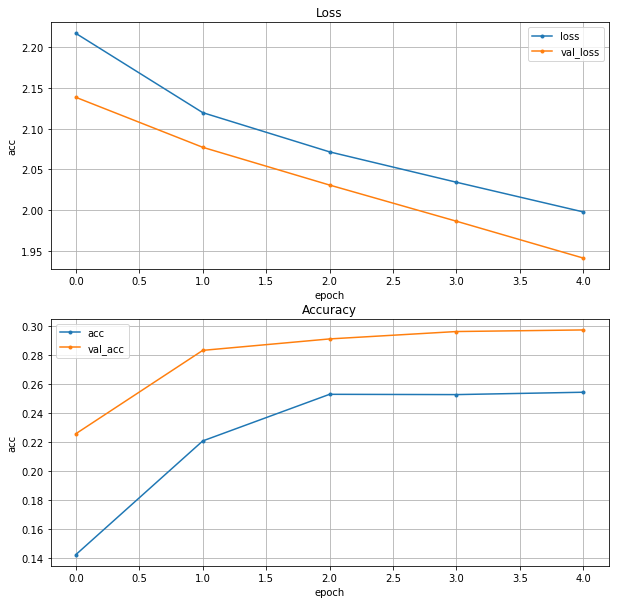

Max Test accuracy: 0.297499999404


In [5]:
# 学習の様子をプロット
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Loss')
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.subplot(2,1,2)
plt.title('Accuracy')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

print('Max Test accuracy:', max(history.history['val_acc']))